In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)
X_train

array([[  1.98900000e+01,   2.02600000e+01,   1.30500000e+02, ...,
          1.61300000e-01,   2.54900000e-01,   9.13600000e-02],
       [  1.28900000e+01,   1.31200000e+01,   8.18900000e+01, ...,
          5.36600000e-02,   2.30900000e-01,   6.91500000e-02],
       [  1.71400000e+01,   1.64000000e+01,   1.16000000e+02, ...,
          2.55000000e-01,   4.06600000e-01,   1.05900000e-01],
       ..., 
       [  1.54600000e+01,   2.39500000e+01,   1.03800000e+02, ...,
          2.16300000e-01,   3.01300000e-01,   1.06700000e-01],
       [  1.70500000e+01,   1.90800000e+01,   1.13400000e+02, ...,
          2.54300000e-01,   3.10900000e-01,   9.06100000e-02],
       [  9.77700000e+00,   1.69900000e+01,   6.25000000e+01, ...,
          5.33400000e-02,   2.53300000e-01,   8.46800000e-02]])

In [4]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [5]:
tree.score(X_train, y_train)

0.98826291079812212

In [6]:
tree.score(X_test, y_test)

0.95104895104895104

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["maligant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)


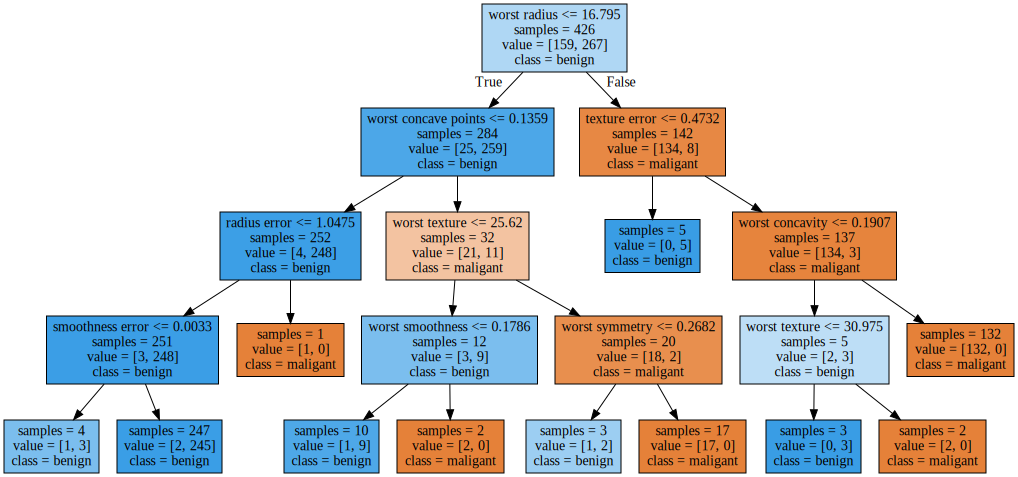

In [9]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01019737,  0.04839825,  0.        ,  0.        ,  0.0024156 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.72682851,  0.0458159 ,  0.        ,  0.        ,  0.0141577 ,
        0.        ,  0.018188  ,  0.1221132 ,  0.01188548,  0.        ])

In [13]:
cancer.data.shape

(569, 30)

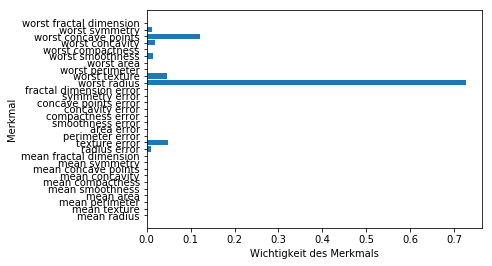

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Wichtigkeit des Merkmals")
    plt.ylabel("Merkmal")
    
plot_feature_importances_cancer(tree)
    